<center>
<img src="https://i.ibb.co/ZVRt2f7/logo.png" alt="logo" border="0" width=800>


---
## 03. A Convolutional Image Classification Neural Network


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will train a neural network to classify images.

---

---

## The Dataset

We will use two sets of synthetic images to train and to test a neural network. The training set includes 5000 synthetic images with a size of 28pixels by 28 pixels, showing the solar disk and a random number of 'sunspots' and also includes a set of targets with the number of spots in each image. The test set includes 1000 of images with the corresponding targets. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


train_images = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/sun_data/sun_image_train.npy")
train_labels = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/sun_data/sun_label_train.npy")

test_images = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/sun_data/sun_image_test.npy")
test_labels = np.load("/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Image Classification NN/sun_data/sun_label_test.npy")

In [3]:
print(train_images.shape)
print(train_labels.shape)

(5000, 28, 28)
(5000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(1000, 28, 28)
(1000,)


These images are already 'normalized', i.e. the entries in the array are numbers in the range [0,1],

In [5]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We can visualize some of the images in the trining set,

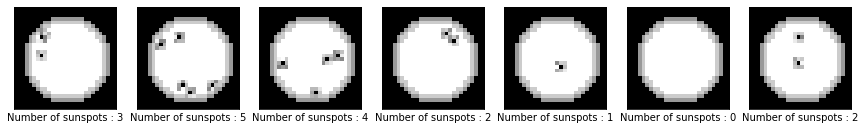

In [6]:
fig, ax = plt.subplots(1,7, figsize=(15,7))

for i in range(7):    
    ax[i].imshow(train_images[i+5], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f'Number of sunspots : {train_labels[i+5]:.0f}')
plt.show()

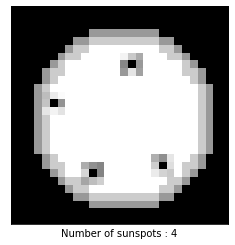

In [7]:
def showImage(x,y,item):
  plt.figure()
  plt.imshow(x[item], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'Number of sunspots : {y[item]:.0f}')
  plt.show()


showImage(train_images, train_labels, 2557)

## The Convolutional Classification Neural Network

We want to train a convolutional neural network model that reads the data and classify these images according to the number of sunspots. Therefore we need to declare the following:

- The model will be a 'Sequential' neural network.

- An input layer that reads the data in the image. This will be a  layer that takes the image of size 28 by 28 with 1 channel and will convert it into an array with 28x28x1 = 784 entries. Therefore, we need 784 neurons in this layer.

- Then, we will use a convolutional 2D layer with 16 kernels with a size of 3x3 pixels and a ReLU activation. The result is a set of 16 images of 28x28 pixel in one channel (i.e. a total of 1x16x28x28= 12544 numbers!!)

- In order to reduce the size of the data, we introduce a MaxPooling2D layer with size 2x2. This layer will use a 2x2 kernel which passes over each image and selects the brigthest  (maximum value) of the four pixels that is covering. As a result, each image will be reduced in size by a factor of 2. Hence, we will have a set of 16 images with 14x14 pixels and 1 channel (i.e. 1x16x14x14= 3136 numbers!!)

- After this we repat the same pair of layers (convolution and maxpooling) two times but using 32 kernels for the convolution.

- We also introduce a Dropout layer, which randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. We use a rate of 0.5 (i.e. half of the neurons are randomly switched off)

- Then we use a dense layer with 128 neurons and a ReLU activation.

- Finally we will incorporate an output dense layer with 6 neurons (because the classes are given by a number from 0 to 5) and a 'softmax' activation function.






In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))


In order to compile the neural network we will include the [ADAM](https://keras.io/api/optimizers/adam/) optimizer, the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) loss function and the [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) metric.

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
# print model summary before training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

Now we will train the model using the train-sets and 20 epochs.

In [11]:
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
157/157 [==============================] - 8s 45ms/step - loss: 1.7661 - accuracy: 0.1878
Epoch 2/20
157/157 [==============================] - 7s 44ms/step - loss: 1.4031 - accuracy: 0.3842
Epoch 3/20
157/157 [==============================] - 4s 24ms/step - loss: 1.2278 - accuracy: 0.4586
Epoch 4/20
157/157 [==============================] - 3s 22ms/step - loss: 1.1495 - accuracy: 0.4960
Epoch 5/20
157/157 [==============================] - 3s 21ms/step - loss: 1.1052 - accuracy: 0.5206
Epoch 6/20
157/157 [==============================] - 3s 21ms/step - loss: 1.0703 - accuracy: 0.5342
Epoch 7/20
157/157 [==============================] - 3s 21ms/step - loss: 1.0306 - accuracy: 0.5492
Epoch 8/20
157/157 [==============================] - 3s 21ms/step - loss: 1.0148 - accuracy: 0.5614
Epoch 9/20
157/157 [==============================] - 3s 21ms/step - loss: 1.0100 - accuracy: 0.5570
Epoch 10/20
157/157 [==============================] - 5s 33ms/step - loss: 0.9684 - accura

---
## Testing the Model

Now we will use the test subsets to probe the model. Using the '.evaluate()' method, we obtain the accuracy of the model (using the metric defined above),

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 0s - loss: 1.4481 - accuracy: 0.4320 - 261ms/epoch - 8ms/step

Test accuracy: 0.4320000112056732


Note that the trained model have an accuracy of just 0.5 on the test set.

Using the '.predict()' method we will obtain the predictions for the test set,

In [13]:
predictions = model.predict(test_images)

32/32 [==============================] - 0s 9ms/step


---
## Visualization of the Results

In order to visualize the result of the mode, we define two plotting functions. The first one shows the image together with the predicted value. The second one shows the probabilities of all the targets for the given sample.

In [14]:
def plot_image(i, p=predictions, tar = test_labels, image = test_images):
  target, img = tar[i], image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

  pred_target = np.argmax(p[i])
  if pred_target == target:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} ({:2.0f}%)   True:{}".format(pred_target,
                                100*np.max(p),
                                target),
                                color=color)


def plot_value_array(i, p=predictions, tar = test_labels):
  target = tar[i]
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), p[i], color="#777777")
  plt.ylim([0, 1])
  pred_target = np.argmax(p[i])

  thisplot[pred_target].set_color('red')
  thisplot[target].set_color('blue')

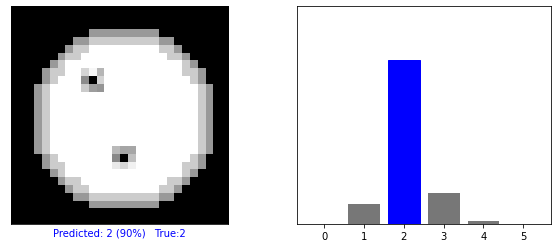

In [27]:
i = int(np.random.rand(1)*len(test_labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i)
plt.subplot(1,2,2)
plot_value_array(i)
plt.show()


The result for a particular sample is a collection of probabilities associated with each of the possible targets (number of stars from 0 to 5),

In [16]:
predictions[18]

array([6.5800095e-01, 2.4470758e-01, 7.1816497e-02, 2.1161783e-02,
       4.2566117e-03, 5.6505582e-05], dtype=float32)

Since we use the activation function 'softmax' in the output layer, the sum of all the probabilities for a single sample is 1,

In [17]:
sum(predictions[18])

0.999999927735189

Using the function 'np.argmax()' we obtain the index corresponding to the maximum probability,

In [18]:
np.argmax(predictions[18])


0

---
## Visualization of the Results

In order to visualize the result of the mode, we define two plotting functions. The first one shows the image together with the predicted value. The second one shows the probabilities of all the targets for the given sample.

In [19]:
def plot_image(i, p=predictions, tar = test_labels, image = test_images):
  target, img = tar[i], image[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap='gray')

  pred_target = np.argmax(p[i])
  if pred_target == target:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} ({:2.0f}%)   True:{}".format(pred_target,
                                100*np.max(p),
                                target),
                                color=color)

def plot_value_array(i, p=predictions, tar = test_labels):
  target = tar[i]
  #plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), p[i], color="#777777")
  plt.ylim([0, 1])
  pred_target = np.argmax(p[i])

  thisplot[pred_target].set_color('red')
  thisplot[target].set_color('blue')

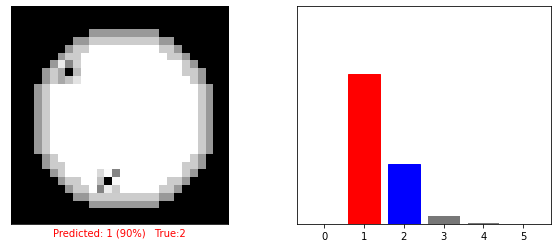

In [20]:
i = 413

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i)
plt.subplot(1,2,2)
plot_value_array(i)
plt.show()